# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + f'{city}' + "&appid=" + weather_api_key + '&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
       

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | ventspils
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | sechura
Processing Record 6 of Set 1 | abadeh
Processing Record 7 of Set 1 | elmendorf air force base
City not found. Skipping...
Processing Record 8 of Set 1 | conceicao do araguaia
Processing Record 9 of Set 1 | codrington
Processing Record 10 of Set 1 | espargos
City not found. Skipping...
Processing Record 11 of Set 1 | port blair
Processing Record 12 of Set 1 | sao joao da barra
Processing Record 13 of Set 1 | pangody
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | flying fish cove
Processing Record 16 of Set 1 | atafu village
Processing Record 17 of Set 1 | ulanhot
Processing Record 18 of Set 1 | sao vicente
Processing Record 19 of Set 1 | lata
Processing Record 20 of Set 1 | waitangi
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,18.91,93,20,3.60,US,1712488343
1,ventspils,57.3894,21.5606,14.96,77,0,7.72,LV,1712488343
2,grytviken,-54.2811,-36.5092,4.57,98,100,5.84,GS,1712488343
3,albany,42.6001,-73.9662,3.06,80,76,0.89,US,1712488343
4,sechura,-5.5569,-80.8222,22.26,78,100,3.63,PE,1712488343


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,18.91,93,20,3.60,US,1712488343
1,ventspils,57.3894,21.5606,14.96,77,0,7.72,LV,1712488343
2,grytviken,-54.2811,-36.5092,4.57,98,100,5.84,GS,1712488343
3,albany,42.6001,-73.9662,3.06,80,76,0.89,US,1712488343
4,sechura,-5.5569,-80.8222,22.26,78,100,3.63,PE,1712488343


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

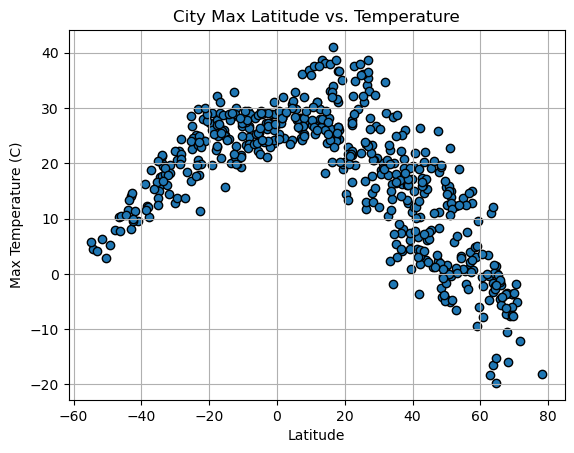

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors= 'black')


# Incorporate the other graph properties
plt.grid()
plt.title('City Max Latitude vs. Temperature')
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

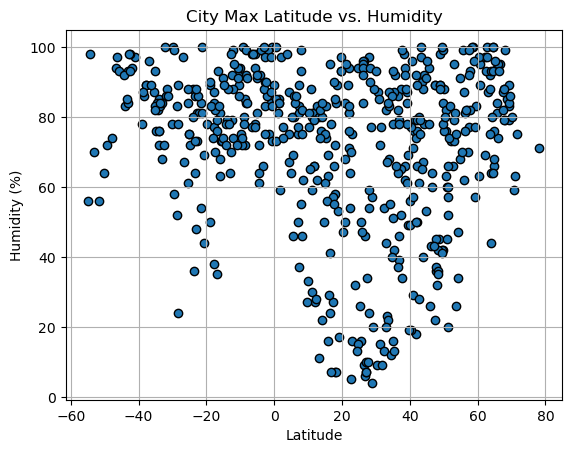

In [9]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors= 'black')


# Incorporate the other graph properties
plt.grid()
plt.title('City Max Latitude vs. Humidity')
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

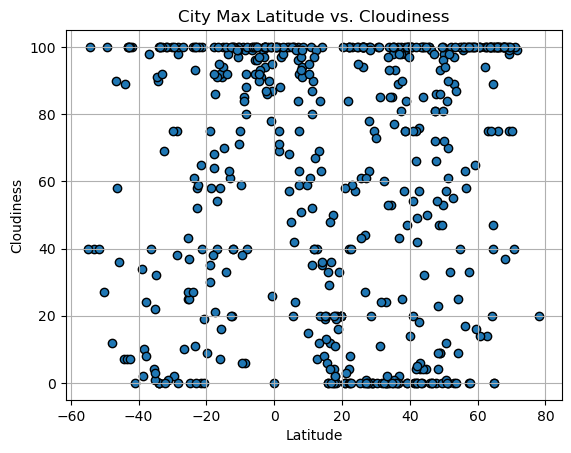

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors= 'black')


# Incorporate the other graph properties
plt.grid()
plt.title('City Max Latitude vs. Cloudiness')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

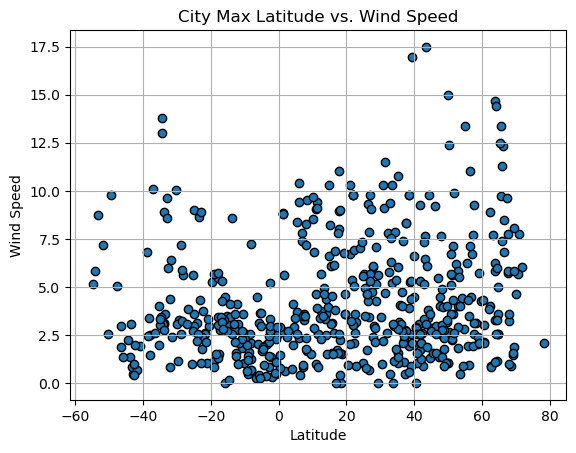

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors= 'black')


# Incorporate the other graph properties
plt.grid()
plt.title('City Max Latitude vs. Wind Speed')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
# Define a function to create Linear Regression plots

def regressor(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regressed = (slope*x) + intercept
    #Plotting scatter points
    plt.scatter(x,y)
    plt.grid()

    #plotting regression model
    plt.plot(x, regressed, 'r')
    line_eq = "Y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))  
    print(f"The r-value is: {rvalue}")
    
   
    plt.show

    return line_eq

  

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,18.91,93,20,3.60,US,1712488343
1,ventspils,57.3894,21.5606,14.96,77,0,7.72,LV,1712488343
3,albany,42.6001,-73.9662,3.06,80,76,0.89,US,1712488343
5,abadeh,31.1608,52.6506,20.05,15,85,9.09,IR,1712488343
8,port blair,11.6667,92.7500,31.02,66,40,2.57,IN,1712488344


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,4.57,98,100,5.84,GS,1712488343
4,sechura,-5.5569,-80.8222,22.26,78,100,3.63,PE,1712488343
6,conceicao do araguaia,-8.2578,-49.2647,24.77,92,92,1.26,BR,1712488344
7,codrington,-38.2667,141.9667,12.31,86,10,3.38,AU,1712488344
9,sao joao da barra,-21.6403,-41.0511,24.05,84,0,2.61,BR,1712488344


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.843064552549896


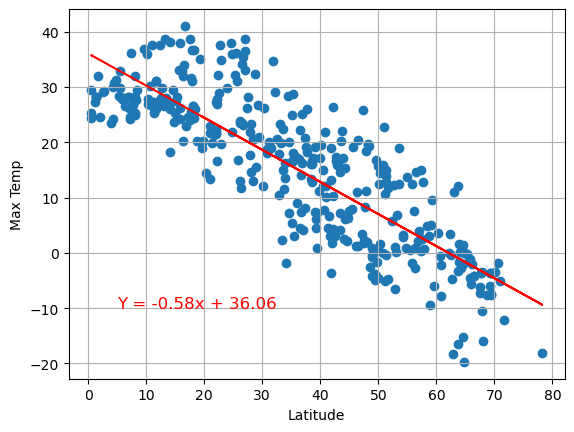

In [88]:
# Linear regression on Northern Hemisphere

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
line_eq = regressor(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.annotate(line_eq,xy=(5, -10), fontsize= 12, color='r')

# Save the figure
plt.savefig("output_data/Fig5.png")

The r-value is: 0.8179116543643445


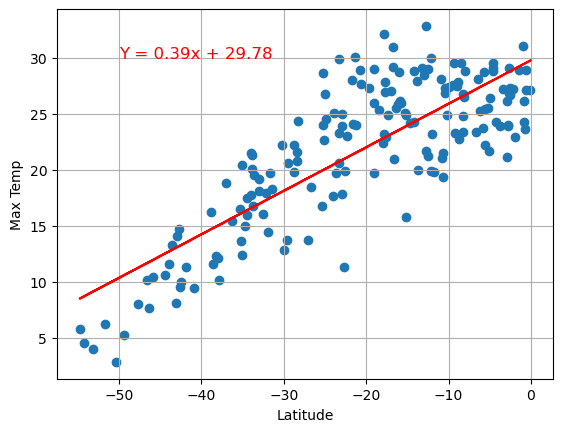

In [89]:
#Linear regression on Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
line_eq1 = regressor(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.annotate(line_eq1,xy=(-50, 30), fontsize= 12, color='r')

# Save the figure
plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:** 

Upon reviewing the regression model, we can see evidence that as you a approach 0 degrees Latitude, the equator, Max temperatures increase. Furthermore, for both the north and south hemisphere, we see an r-value above .7. This presents a case for strong correlation between temperature and latitude.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18263156779452228


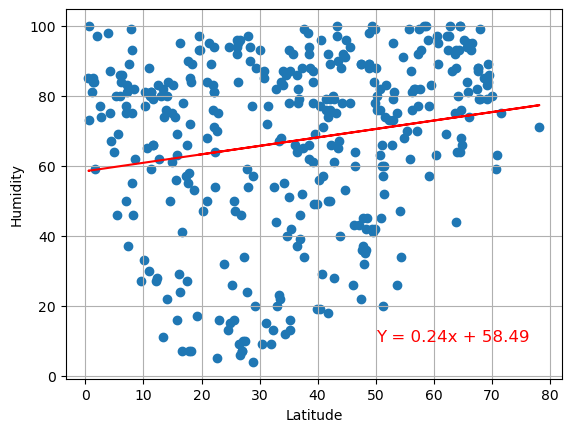

In [90]:
# Northern Hemisphere

plt.xlabel('Latitude')
plt.ylabel('Humidity')
line_eq = regressor(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.annotate(line_eq,xy=(50, 10), fontsize= 12, color='r')

# Save the figure
plt.savefig("output_data/Fig7.png")

The r-value is: 0.07478246580403407


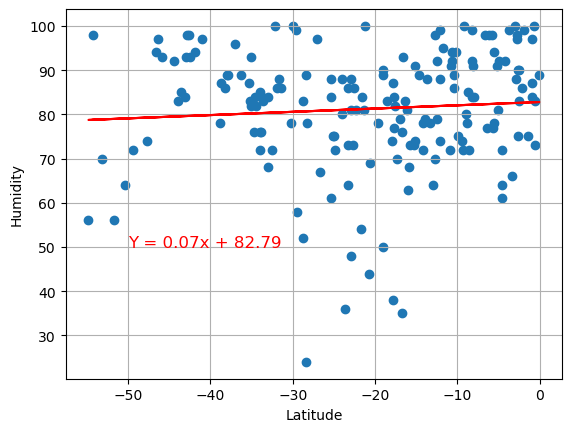

In [91]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity')
line_eq = regressor(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.annotate(line_eq,xy=(-50, 50), fontsize= 12, color='r')

# Save the figure
plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** 
It appears that the relationship between Latitude and Humidity is not linear. Here we see an r-value less than 0.3, which suggest none or very little correlation between the them. Furthermore, in the sample drawn for the southern hemisphere, it seems humidity is contrated around 80. With an x (latitude) coefficient of 0.07 calculated for the sample drawn, as latitude goes up and down humidity would not be very responsive.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13233791933787745


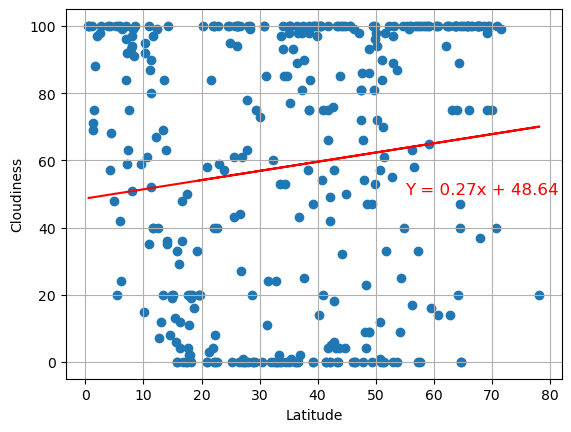

In [92]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
line_eq = regressor(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.annotate(line_eq,xy=(55, 50), fontsize= 12, color='r')

# Save the figure
plt.savefig("output_data/Fig9.png")

The r-value is: 0.34206670819094015


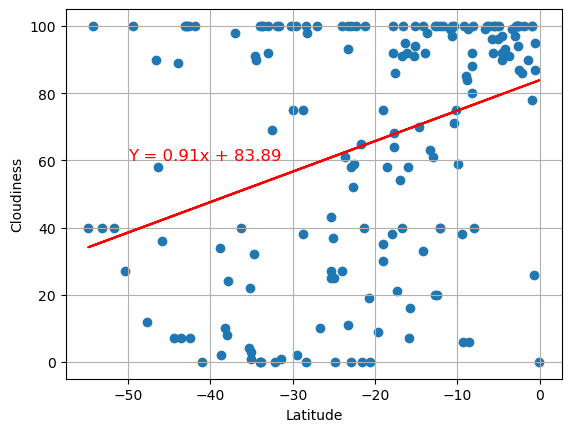

In [93]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
line_eq = regressor(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.annotate(line_eq,xy=(-50, 60), fontsize= 12, color='r')

# Save the figure
plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** 
The relationship between latitude and cloudiness does no appear to be linear and the correlation (r-value) between the two ranges from none/very weak to week. 

As more of a discussin than an analysis, I want to say this makes sense because clouds formation is probably heavily influenced moisture in the air and moisture in the air is likely tied to a city's proximity to bodies of water. Therefore, two cities on the same latitude but having vastly different proximities to water may experience vastly different cloudiness. I believe this can be observed in both the northern and southern figures as latitude points are experiencing multiple cloudiness data entries. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05335094627869474


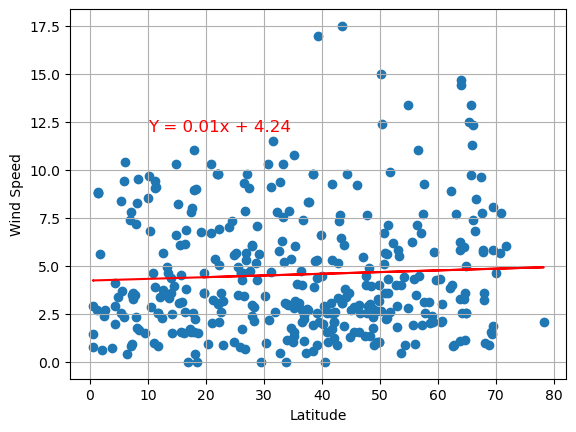

In [94]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
line_eq = regressor(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.annotate(line_eq,xy=(10, 12), fontsize= 12, color='r')

# Save the figure
plt.savefig("output_data/Fig11.png")

The r-value is: -0.3342992189743045


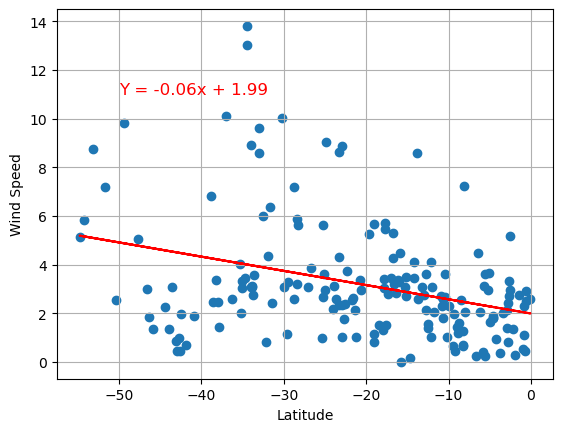

In [95]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
line_eq = regressor(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.annotate(line_eq,xy=(-50, 11), fontsize= 12, color='r')

# Save the figure
plt.savefig("output_data/Fig12.png")

**Discussion about the linear relationship:** 
In the Northern hemisphere, wind speed seems to have a very week correlation with Latitude as my current sample generated an r-value of about 0.05. This suggest that the relationship betweeen the two is not lineaer and the graph captures that.

The southern hemisphere on the other hand is a little less obvious given my sample. While the (absolute) r-value generated is about 0.33, suggesting a weak correlation, a decent concentration of the obseervation is centered around the regression model. This may be a case of having to use discretion on the significance of latitude on wind speeds in the south as at a glance, this model may be heavily influenced by outliers preventing a closer fitting model.

As more of a discussion, I'm not sure if southern hemisphere's data has less variance than the north because theres generally less landmass/cities in the souther hemispere. 